#### Assignment: 8.2 Exercise: Model Evaluation and Selection
#### Name: Prashant Raghuwanshi 
#### Date: 10/23/2021
#### Course: DSC550-T301 Data Mining (2221-1)

##### Case Study:  Titanic Case Study Part 3

In [1]:
import pandas as pd
import yellowbrick
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# 1.Load the data from the “train.csv” file into a DataFrame.
addr1 = "C:/Users/dell/Documents/Machine_learning_assigments/week-6/train.csv"
df_train = pd.read_csv(addr1)

In [3]:
# 2.Display the dimensions of the file (so you’ll have a good idea the amount of data you are working with.
print("The dimension of the table is: ", df_train.shape)

The dimension of the table is:  (891, 12)


In [4]:
# 3.Display the first 5 rows of data so you can see the column headings and the type of data for each column.
print(df_train.head(5))
# a.Notice that Survived is represented as a 1 or 0
# b.Notice that missing data is represented as “NaN”
# c.The Survived variable will be the “target” and the other variables will be the “features”

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [5]:
#4.	Think about some questions that might help you predict who will survive:
# a.What do the variables look like? For example, are they numerical or categorical data. If they are numerical, what are their distribution; if they are categorical, how many are they in different categories?
# b.Are the numerical variables correlated?
# c.Are the distributions of numerical variables the same or different among survived and not survived? Is the survival rate different for different values? For example, were people more likely to survive if they were younger?
# d.Are there different survival rates in different categories? For example, did more women survived than man?

In [6]:
# target variable is categorical variable, some of the feature variable are numeric

In [7]:
#5.Look at summary information about your data (total, mean, min, max, freq, unique, etc.)  
print("\nDescribe Data\n")
print(df_train.describe())


Describe Data

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [8]:
print("\nSummarized Data\n")
print(df_train.describe(include=['O']))


Summarized Data

                                    Name   Sex  Ticket        Cabin Embarked
count                                891   891     891          204      889
unique                               891     2     681          147        3
top     Vande Velde, Mr. Johannes Joseph  male  347082  C23 C25 C27        S
freq                                   1   577       7            4      644


In [9]:
#6.Make some histograms of your data (“A picture is worth a thousand words!”)
#  a.Most of the passengers are around 20 to 30 years old and don't have siblings or relatives with them. 
#  b.A large amount of the tickets sold were less than $50. There are very few tickets sold where the fare was over $500.

num_features = ['Age', 'SibSp', 'Parch', 'Fare']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts']

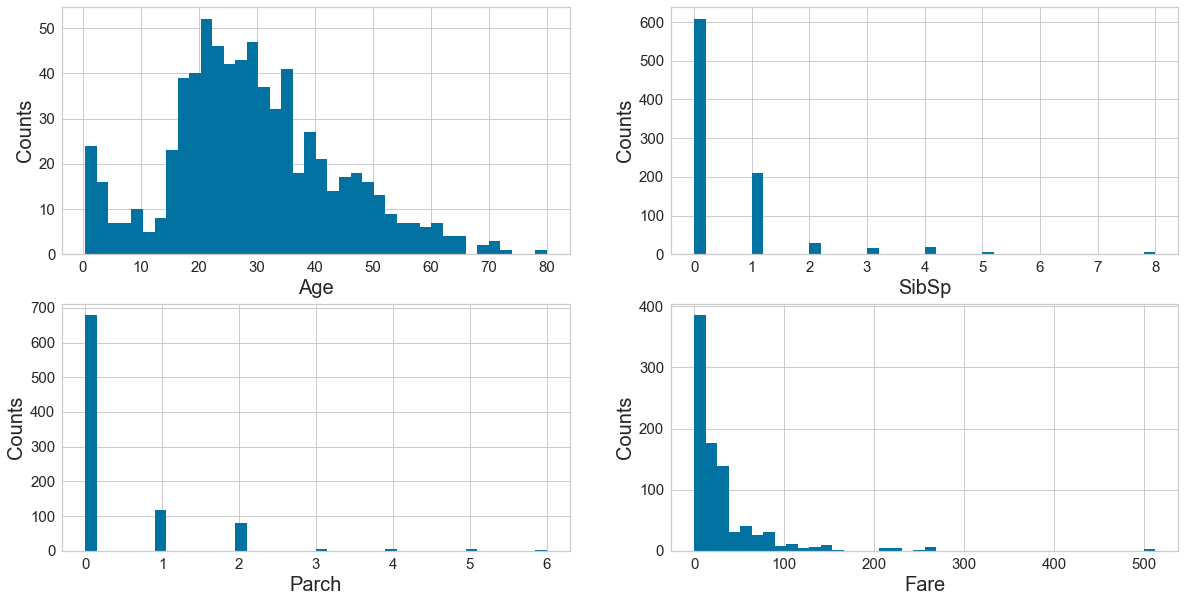

In [10]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df_train[num_features[idx]].dropna(), bins=40)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

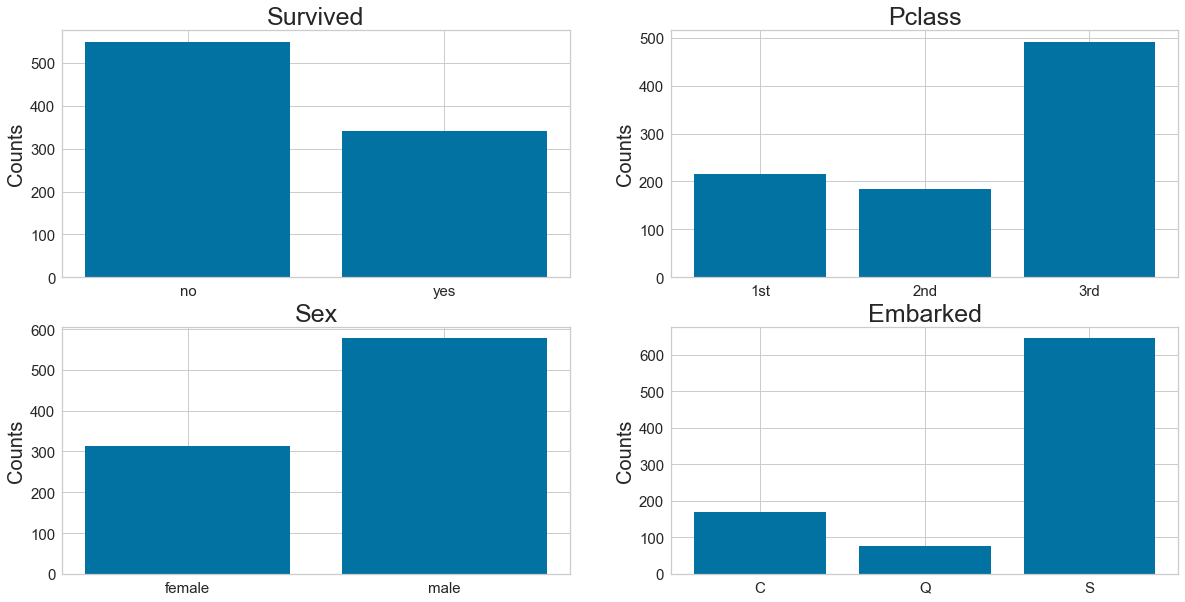

In [11]:
#7.Make some bar charts for variables with only a few options.
#a.Ticket and Cabin have more than 100 variables so don’t do those!
#%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# make the data read to feed into the visulizer
X_Survived = df_train.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Survived']
Y_Survived = df_train.replace({'Survived': {1: 'yes', 0: 'no'}}).groupby('Survived').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 0].bar(X_Survived, Y_Survived)
axes[0, 0].set_title('Survived', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
# make the data read to feed into the visulizer
X_Pclass = df_train.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Pclass']
Y_Pclass = df_train.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}}).groupby('Pclass').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[0, 1].bar(X_Pclass, Y_Pclass)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Sex = df_train.groupby('Sex').size().reset_index(name='Counts')['Sex']
Y_Sex = df_train.groupby('Sex').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 0].bar(X_Sex, Y_Sex)
axes[1, 0].set_title('Sex', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_Embarked = df_train.groupby('Embarked').size().reset_index(name='Counts')['Embarked']
Y_Embarked = df_train.groupby('Embarked').size().reset_index(name='Counts')['Counts']
# make the bar plot
axes[1, 1].bar(X_Embarked, Y_Embarked)
axes[1, 1].set_title('Embarked', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
#plt.show()


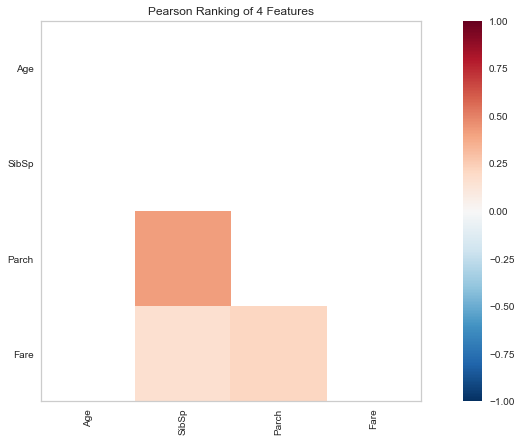

In [12]:
#8.To see if the data is correlated, make some Pearson Ranking charts
#  b.The correlation between the variables is low (1 or -1 is high positive or high negative, 0 is low or no correlation)  
#    These results show there is “some” positive correlation but it’s not a high correlation.

plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df_train[num_features].to_numpy()

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
visualizer.fit(X)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
#  a.Notice that in my sample code, I have saved this png file.
visualizer.poof(outpath="d://pcoords1.png") # Draw/show/poof the data
#plt.show()

In [13]:
#Use Parallel Coordinates visualization to compare the distributions of numerical variables between passengers that survived and those that did not survive.
#a. That’s a cool chart, isn’t it?!  
# Compare variables against Survived and Not Survived
#set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

In [14]:
# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')
# import packages
from yellowbrick.features import ParallelCoordinates

In [15]:
# Specify the features of interest and the classes of the target
classes = ['Not-survived', 'Survived']
num_features = ['Age', 'SibSp', 'Parch', 'Fare']
# copy data to a new dataframe
data_norm = df_train.copy()

In [16]:
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (df_train[feature] - df_train[feature].mean(skipna=True)) / (df_train[feature].max(skipna=True) - df_train[feature].min(skipna=True))

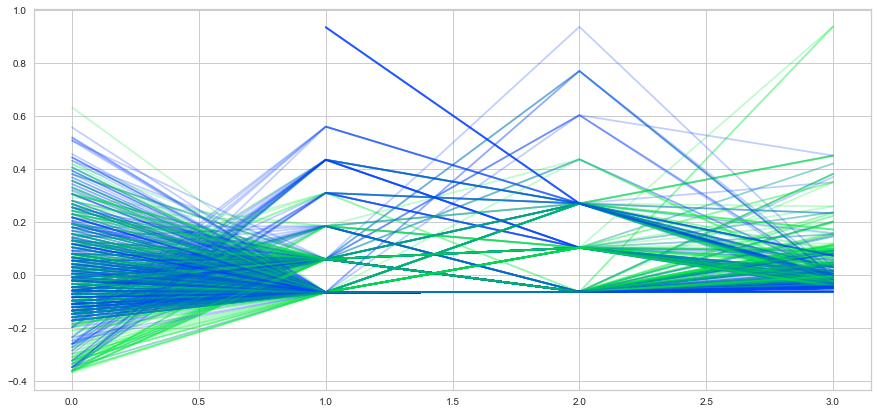

In [17]:
# Extract the numpy arrays from the data frame
X = data_norm[num_features].to_numpy()
y = df_train.Survived.to_numpy()

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="d://pcoords2.png") # Draw/show/poof the data
plt.show();


#####   Passengers traveling with siblings on the boat have a higher death rate
#####   passengers who paid a higher fare had a higher survival rate.  

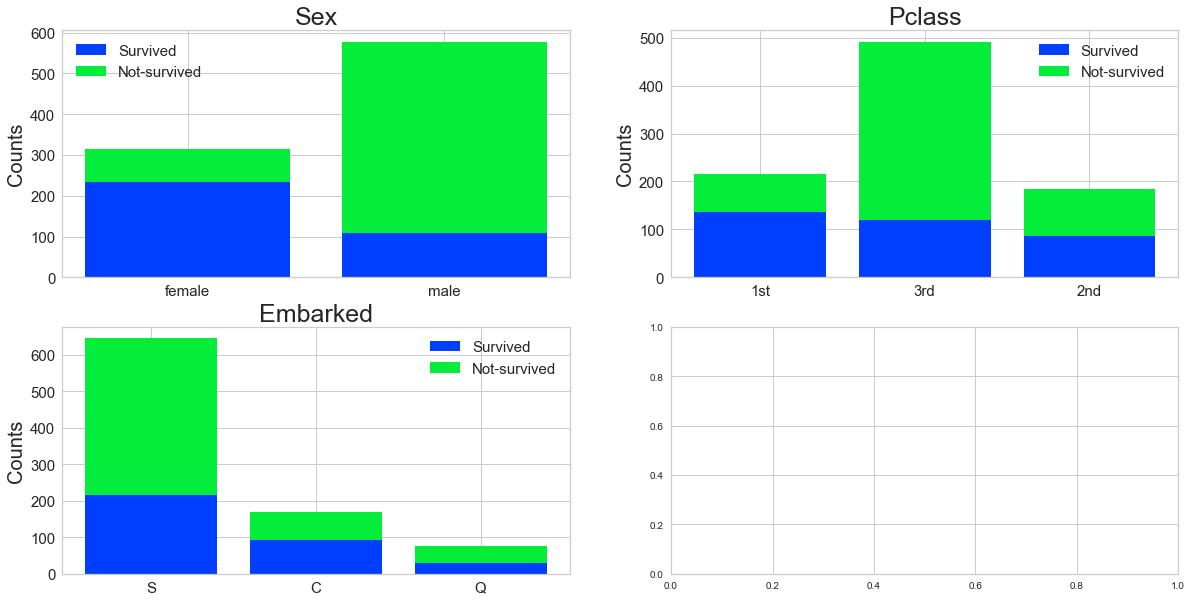

In [18]:
#10.Use Stack Bar Charts to compare passengers who survived to passengers who didn’t survive based on the other variables.
# a.More females survived than men.  3rd Class Tickets had a lower survival rate.  
# Also, Embarkation from Southampton port had a lower survival rate.
plt.rcParams['figure.figsize'] = (20, 10)
# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)
# make the data read to feed into the visulizer
Sex_survived = df_train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df_train['Survived']==1]['Sex'].value_counts()
Sex_not_survived = df_train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df_train['Survived']==0]['Sex'].value_counts()
Sex_not_survived = Sex_not_survived.reindex(index = Sex_survived.index)
# make the bar plot
p1 = axes[0, 0].bar(Sex_survived.index, Sex_survived.values)
p2 = axes[0, 0].bar(Sex_not_survived.index, Sex_not_survived.values, bottom=Sex_survived.values)
axes[0, 0].set_title('Sex', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Pclass_survived = df_train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[df_train['Survived']==1]['Pclass'].value_counts()
Pclass_not_survived = df_train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}}).replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})[df_train['Survived']==0]['Pclass'].value_counts()
Pclass_not_survived = Pclass_not_survived.reindex(index = Pclass_survived.index)
# make the bar plot
p3 = axes[0, 1].bar(Pclass_survived.index, Pclass_survived.values)
p4 = axes[0, 1].bar(Pclass_not_survived.index, Pclass_not_survived.values, bottom=Pclass_survived.values)
axes[0, 1].set_title('Pclass', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Survived', 'Not-survived'), fontsize = 15)

# make the data read to feed into the visualizer
Embarked_survived = df_train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df_train['Survived']==1]['Embarked'].value_counts()
Embarked_not_survived = df_train.replace({'Survived': {1: 'Survived', 0: 'Not-survived'}})[df_train['Survived']==0]['Embarked'].value_counts()
Embarked_not_survived = Embarked_not_survived.reindex(index = Embarked_survived.index)
# make the bar plot
p5 = axes[1, 0].bar(Embarked_survived.index, Embarked_survived.values)
p6 = axes[1, 0].bar(Embarked_not_survived.index, Embarked_not_survived.values, bottom=Embarked_survived.values)
axes[1, 0].set_title('Embarked', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Survived', 'Not-survived'), fontsize = 15)
#plt.show()


In [19]:
# 11.Some of my questions have been answered by seeing the charts but in some ways, 
# looking at this much data has created even more questions.  
# a.Now it’s time to reduce some of the features so we can concentrate on the things that matter!  
#   There features we will get rid of are:  "PassengerId", "Name", "Ticket" and "Cabin".  
#   (ID doesn’t really give us any useful data, Ticket and Cabin have too many variables. 
#   Name might reflect that they are related but we’re keeping the category about siblings (for now).    

In [20]:
# b.We can also fill in missing values.  
# (Cabin has some missing values but we are dropping that feature.)  
#  Age has some missing values so I’ll fill in with the average age.  
#  Embarked also has some missing so I’ll the most common.

In [21]:
#fill the missing age data with median value
def fill_na_median(df_train, inplace=True):
    return df_train.fillna(df_train.median(), inplace=inplace)

fill_na_median(df_train['Age'])

# check the result
print(df_train['Age'].describe())

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64


In [22]:
# fill with the most represented value
def fill_na_most(df_train, inplace=True):
    return df_train.fillna('S', inplace=inplace)

fill_na_most(df_train['Embarked'])

# check the result
print(df_train['Embarked'].describe())

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


In [23]:
# import package
import numpy as np

# log-transformation
def log_transformation(df_train):
    return df_train.apply(np.log1p)

df_train['Fare_log1p'] = log_transformation(df_train['Fare'])

# check the data
print(df_train.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  Fare_log1p  
count  891.000000  891.000000  891.000000  
mean     0.381594   32.204208    2.962246  
std      0.806057   49.693429    0.969048  
min      0.000000    0.000000    0.000000  
25%      0.000000    7.910400    2.187218  
50%      0.000000   14.454200    2.737881  
75%      0.000000   31.000000    3.465736  
max      6.000000

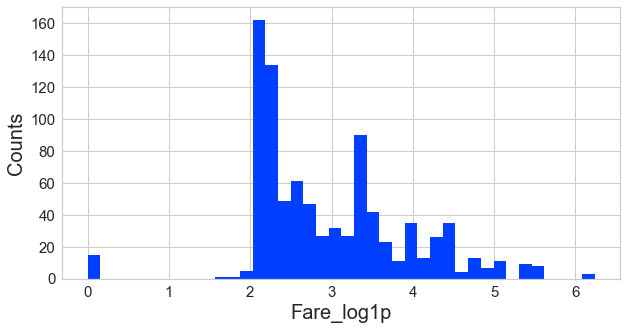

In [24]:
#12 If you go back and look at the histograms of Fare, you’ll see that it is very skewed…many low cost fares, not very many high cost fares.  
# Log Transformation is a good method to use on highly skewed data.  
#check the distribution using histogram
# set up the figure size
#%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 5)

plt.hist(df_train['Fare_log1p'], bins=40)
plt.xlabel('Fare_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
#plt.show()

In [25]:
# Convert your categorical data into numbers (Sex, PClass, Embark)
#Step 13 - convert categorical data to numbers
#get the categorical data
cat_features = ['Pclass', 'Sex', "Embarked"]
data_cat = df_train[cat_features]

In [26]:
data_cat.head()

,Pclass,Sex,Embarked
0,3,male,S
1,1,female,C
2,3,female,S
3,1,female,S
4,3,male,S


In [27]:
data_cat = data_cat.replace({'Pclass': {1: '1st', 2: '2nd', 3: '3rd'}})

In [28]:
data_cat.head()

,Pclass,Sex,Embarked
0,3rd,male,S
1,1st,female,C
2,3rd,female,S
3,1st,female,S
4,3rd,male,S


In [29]:
# One Hot Encoding 
data_cat_dummies = pd.get_dummies(data_cat)
# check the data
print(data_cat_dummies.head(8))

   Pclass_1st  Pclass_2nd  Pclass_3rd  Sex_female  Sex_male  Embarked_C  \
0           0           0           1           0         1           0   
1           1           0           0           1         0           1   
2           0           0           1           1         0           0   
3           1           0           0           1         0           0   
4           0           0           1           0         1           0   
5           0           0           1           0         1           0   
6           1           0           0           0         1           0   
7           0           0           1           0         1           0   

   Embarked_Q  Embarked_S  
0           0           1  
1           0           0  
2           0           1  
3           0           1  
4           0           1  
5           1           0  
6           0           1  
7           0           1  


CASE STUDY -3

In [30]:
#Step 14 - create a whole features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['Age', 'SibSp', 'Parch', 'Fare_log1p']
data_model_X = pd.concat([df_train[features_model], data_cat_dummies], axis=1)

In [31]:
data_model_X.head()

,Age,SibSp,Parch,Fare_log1p,Pclass_1st,Pclass_2nd,Pclass_3rd,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,1,0,2.110213,0,0,1,0,1,0,0,1
1,38.0,1,0,4.280593,1,0,0,1,0,1,0,0
2,26.0,0,0,2.188856,0,0,1,1,0,0,0,1
3,35.0,1,0,3.990834,1,0,0,1,0,0,0,1
4,35.0,0,0,2.202765,0,0,1,0,1,0,0,1


In [32]:
# create a whole target dataset that can be used for train and validation data splitting
#data_model_y1 = df_train.replace({'Survived': {1: 'Survived', 0: 'Not_survived'}})['Survived']
data_model_y = df_train['Survived']
data_model_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [34]:
# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(data_model_X, data_model_y, test_size =0.3, random_state=11)

# number of samples in each set
print("No. of samples in training set: ", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

# Survived and not-survived
print('\n')
print('No. of survived and not-survived in the training set:')
print(y_train.value_counts())

print('\n')
print('No. of survived and not-survived in the validation set:')
print(y_val.value_counts())

No. of samples in training set:  623
No. of samples in validation set: 268


No. of survived and not-survived in the training set:
0    373
1    250
Name: Survived, dtype: int64


No. of survived and not-survived in the validation set:
0    176
1     92
Name: Survived, dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:191: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  >>> y_true = [0, 1, 2, 3]


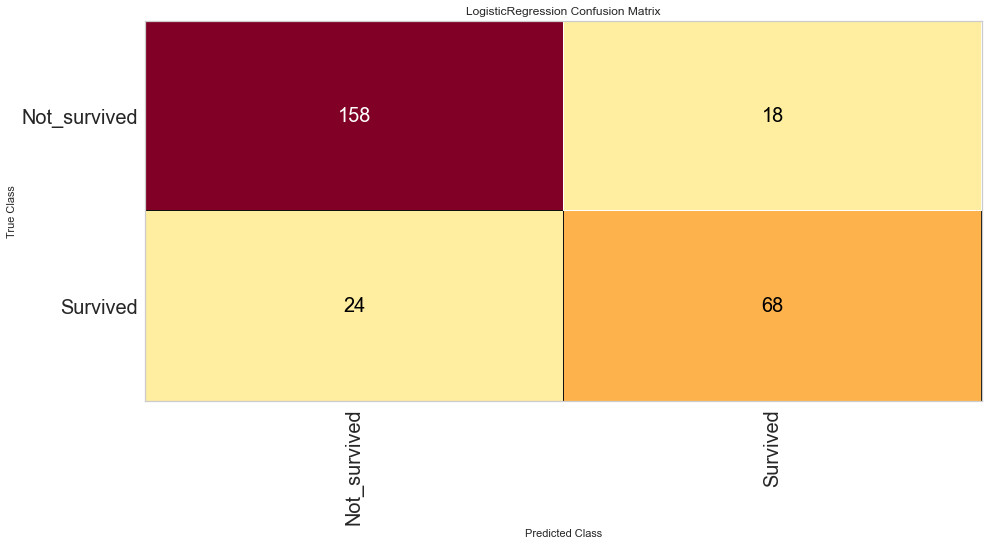

In [38]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC
# ROC and AUC
# Instantiate the classification model 
model = LogisticRegression(solver='liblinear')
#The ConfusionMatrix visualizer taxes a model
classes = ['Not_survived','Survived']
cm = ConfusionMatrix(model, classes=classes, label_encoder={0: "Not_survived", 1: "Survived"}, percent=False)

#Fit fits the passed model. This is unnecessary if you pass the visualizer a pre-fitted model
cm.fit(X_train, y_train)

#To create the ConfusionMatrix, we need some test data. Score runs predict() on the data
#and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)

#How did we do?
cm.poof()

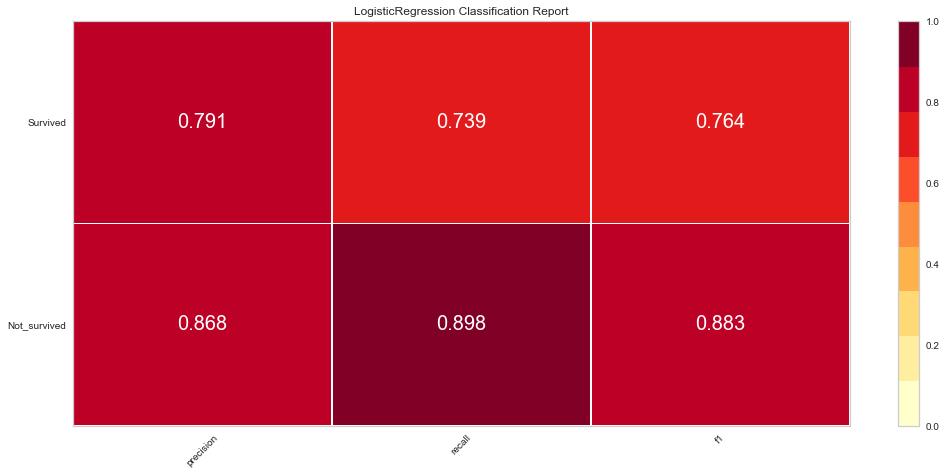

In [39]:
# Step 15 - Eval Metrics
# Precision, Recall, and F1 Score
# set the size of the figure and the font size 
#%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes=classes)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()

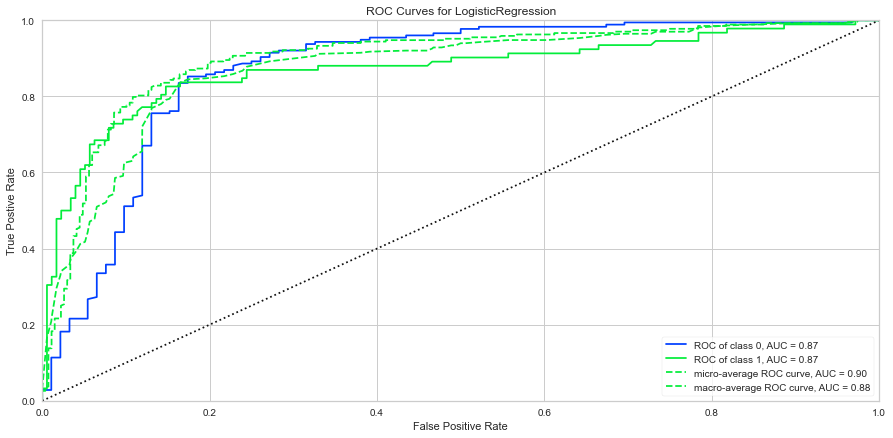

In [40]:
# ROC and AUC
#Instantiate the visualizer
visualizer = ROCAUC(model, pos_label = 1)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_val, y_val)  # Evaluate the model on the test data
g = visualizer.poof()